In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load CSV data
def load_csv(file_path):
    return pd.read_csv(file_path)

# Function to interpolate data
def interpolate_data(data, num_points):
    linspace = np.linspace(0, len(data) - 1, num_points)
    interpolated_data = np.column_stack([
        np.interp(linspace, np.arange(len(data)), data['PointerPosX']),
        np.interp(linspace, np.arange(len(data)), data['PointerPosY']),
        np.interp(linspace, np.arange(len(data)), data['PointerPosZ'])
    ])
    return interpolated_data

# Function to calculate Euclidean distances
def calculate_distances(data1, data2):
    return np.linalg.norm(data1 - data2, axis=1)

# Main function for processing and plotting
def process_and_plot(paths):
    stats = {
        'Average Distance': [],
        'Maximum Distance': [],
        'Standard Deviation': []
    }

    for before_path, after_path in paths:
        # Load data
        data_before = load_csv(before_path)
        data_after = load_csv(after_path)
        
        # Determine the number of interpolation points
        num_points = max(len(data_before), len(data_after))
        
        # Interpolate data
        interpolated_before = interpolate_data(data_before, num_points)
        interpolated_after = interpolate_data(data_after, num_points)
        
        # Calculate distances
        distances = calculate_distances(interpolated_before, interpolated_after)
        
        # Gather statistics
        stats['Average Distance'].append(np.mean(distances))
        stats['Maximum Distance'].append(np.max(distances))
        stats['Standard Deviation'].append(np.std(distances))

    print(stats)

    # Plotting the statistics
    fig, ax = plt.subplots(3, 1, figsize=(5, 8))
    ax[0].bar(range(len(stats['Average Distance'])), stats['Average Distance'], color='b', alpha=0.7)
    ax[0].set_title('Average Distance')
    ax[1].bar(range(len(stats['Maximum Distance'])), stats['Maximum Distance'], color='r', alpha=0.7)
    ax[1].set_title('Maximum Distance')
    ax[2].bar(range(len(stats['Standard Deviation'])), stats['Standard Deviation'], color='g', alpha=0.7)
    ax[2].set_title('Standard Deviation')

    plt.tight_layout()
    plt.show()

{'Average Distance': [0.02802610632855519, 0.07141943535951388, 0.07452077404388033, 0.05599977376885516, 0.1024560511775146], 'Maximum Distance': [0.06580289615397886, 0.14374534092336957, 0.20621994328475443, 0.12757960121278972, 0.2128716868058181], 'Standard Deviation': [0.01836997209144315, 0.037074190166434304, 0.04815344290753523, 0.036686468731942146, 0.05773627051902801]}


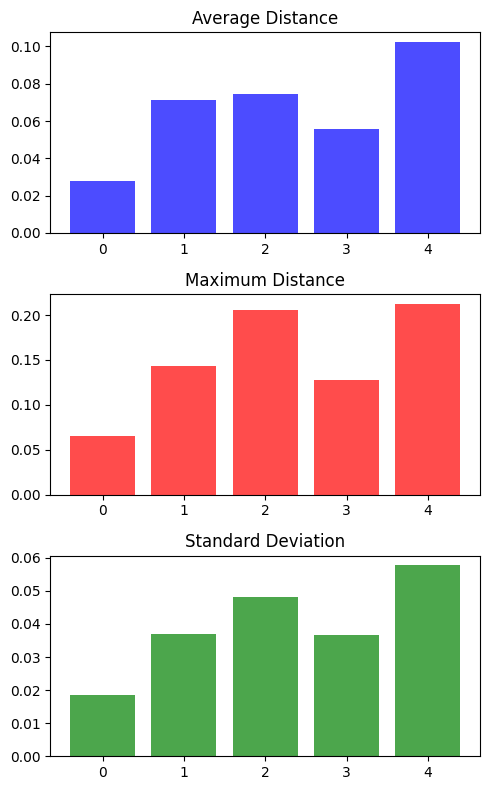

In [31]:

paths1 = [
    ("task1/CursorData_Before1.csv", "task1/CursorData1.csv"),
    ("task1/CursorData_Before2.csv", "task1/CursorData2.csv"),
    ("task1/CursorData_Before3.csv", "task1/CursorData3.csv"),
    ("task1/CursorData_Before4.csv", "task1/CursorData4.csv"),
    ("task1/CursorData_Before5.csv", "task1/CursorData5.csv"),
    # Add paths for all your datasets
]
process_and_plot(paths1)

{'Average Distance': [0.19090001424125758, 0.16920384110164288, 0.11116042600599794, 0.08891310526144258, 0.13485456648100266], 'Maximum Distance': [0.35077563175197185, 0.32293024378223073, 0.3097606422320766, 0.2341164567276966, 0.44190966447414187], 'Standard Deviation': [0.10525482073406275, 0.08878126696743319, 0.08169435079608597, 0.06008647629792733, 0.13404480889322887]}


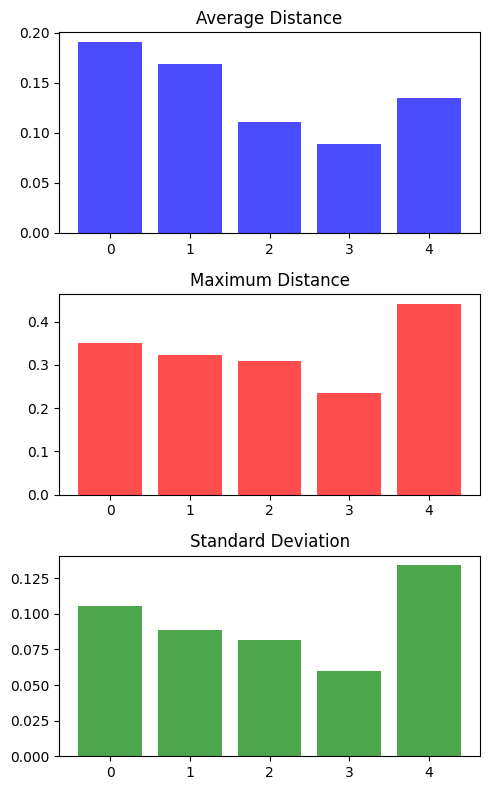

In [32]:
paths2 = [
    ("task2/CursorData_Before1.csv", "task2/CursorData1.csv"),
    ("task2/CursorData_Before2.csv", "task2/CursorData2.csv"),
    ("task2/CursorData_Before3.csv", "task2/CursorData3.csv"),
    ("task2/CursorData_Before4.csv", "task2/CursorData4.csv"),
    ("task2/CursorData_Before5.csv", "task2/CursorData5.csv"),
    # Add paths for all your datasets
]
process_and_plot(paths2)

In [33]:

def calculate_angles(points):
    vectors = np.diff(points, axis=0)
    angles = []
    for i in range(len(vectors) - 1):
        vec1 = vectors[i]
        vec2 = vectors[i + 1]
        cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        cos_theta = np.clip(cos_theta, -1.0, 1.0)  # avoid numerical errors
        angle = np.arccos(cos_theta)
        angles.append(np.degrees(angle))
    return angles

def process_file_pairs(paths):
    avg_angles = []
    std_angles = []

    for before_path, after_path in paths:
        print(f"Processing pair: {before_path}, {after_path}")
        data_before = load_data(before_path)
        data_after = load_data(after_path)
        
        if data_before.empty or data_after.empty:
            print(f"Warning: Data at {before_path} or {after_path} is empty.")
            continue
        
        # Calculate angles
        angles_before = calculate_angles(data_before[['PointerPosX', 'PointerPosY', 'PointerPosZ']].values)
        angles_after = calculate_angles(data_after[['PointerPosX', 'PointerPosY', 'PointerPosZ']].values)
        
        print(f"Before angles: Average={np.mean(angles_before)}, Std={np.std(angles_before)}")
        print(f"After angles: Average={np.mean(angles_after)}, Std={np.std(angles_after)}")
        
        avg_angles.append((np.mean(angles_before), np.mean(angles_after)))
        std_angles.append((np.std(angles_before), np.std(angles_after)))

    return avg_angles, std_angles

def plot_results(avg_angles, std_angles):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
    # Average angles
    axs[0].bar(np.arange(len(avg_angles)) * 2 - 0.2, [x[0] for x in avg_angles], width=0.4, label='Before')
    axs[0].bar(np.arange(len(avg_angles)) * 2 + 0.2, [x[1] for x in avg_angles], width=0.4, label='After')
    axs[0].set_title('Average Angle Between Vectors')
    axs[0].legend()

    # Standard deviations
    axs[1].bar(np.arange(len(std_angles)) * 2 - 0.2, [x[0] for x in std_angles], width=0.4, label='Before')
    axs[1].bar(np.arange(len(std_angles)) * 2 + 0.2, [x[1] for x in std_angles], width=0.4, label='After')
    axs[1].set_title('Standard Deviation of Angles')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

Processing pair: task1/CursorData_Before1.csv, task1/CursorData1.csv
Before angles: Average=11.032638441818559, Std=10.10234118005653
After angles: Average=9.206860033099915, Std=5.410954061217556
Processing pair: task1/CursorData_Before2.csv, task1/CursorData2.csv
Before angles: Average=13.235428950209227, Std=11.02339373235282
After angles: Average=9.465330347742508, Std=3.922447911418106
Processing pair: task1/CursorData_Before3.csv, task1/CursorData3.csv
Before angles: Average=12.279212524211738, Std=13.712889292144789
After angles: Average=12.643505407828897, Std=6.5510494069663805
Processing pair: task1/CursorData_Before4.csv, task1/CursorData4.csv
Before angles: Average=14.3711676676719, Std=14.540071895579889
After angles: Average=10.251257224757765, Std=7.180422174121553
Processing pair: task1/CursorData_Before5.csv, task1/CursorData5.csv
Before angles: Average=12.499217899414452, Std=11.062131150418892
After angles: Average=8.664310891386256, Std=4.131631463232154


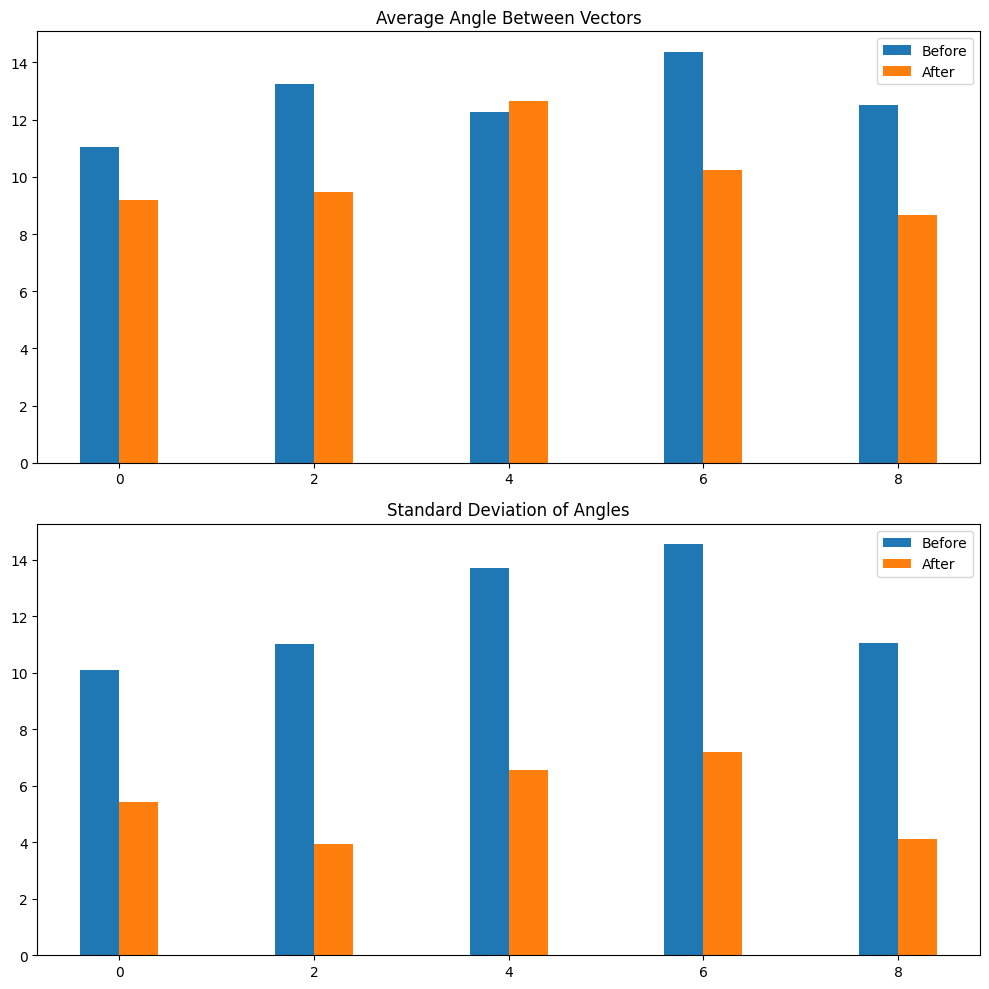

In [34]:
# Process files and plot results
avg_angles, std_angles = process_file_pairs(paths1)
plot_results(avg_angles, std_angles)

Processing pair: task2/CursorData_Before1.csv, task2/CursorData1.csv
Before angles: Average=12.470639463341007, Std=11.68350079290271
After angles: Average=12.683828396877315, Std=6.0233611326305585
Processing pair: task2/CursorData_Before2.csv, task2/CursorData2.csv
Before angles: Average=15.364976234139784, Std=14.977366854277653
After angles: Average=13.885255486349811, Std=7.849503482544686
Processing pair: task2/CursorData_Before3.csv, task2/CursorData3.csv
Before angles: Average=13.371783620634927, Std=14.065241610869878
After angles: Average=12.746544391283704, Std=9.780531033436201
Processing pair: task2/CursorData_Before4.csv, task2/CursorData4.csv
Before angles: Average=12.505861402432718, Std=12.826271820656046
After angles: Average=12.756220342426442, Std=7.353724768044575
Processing pair: task2/CursorData_Before5.csv, task2/CursorData5.csv
Before angles: Average=17.446620121936288, Std=20.187259061783532
After angles: Average=14.405219798729696, Std=9.20233998032556


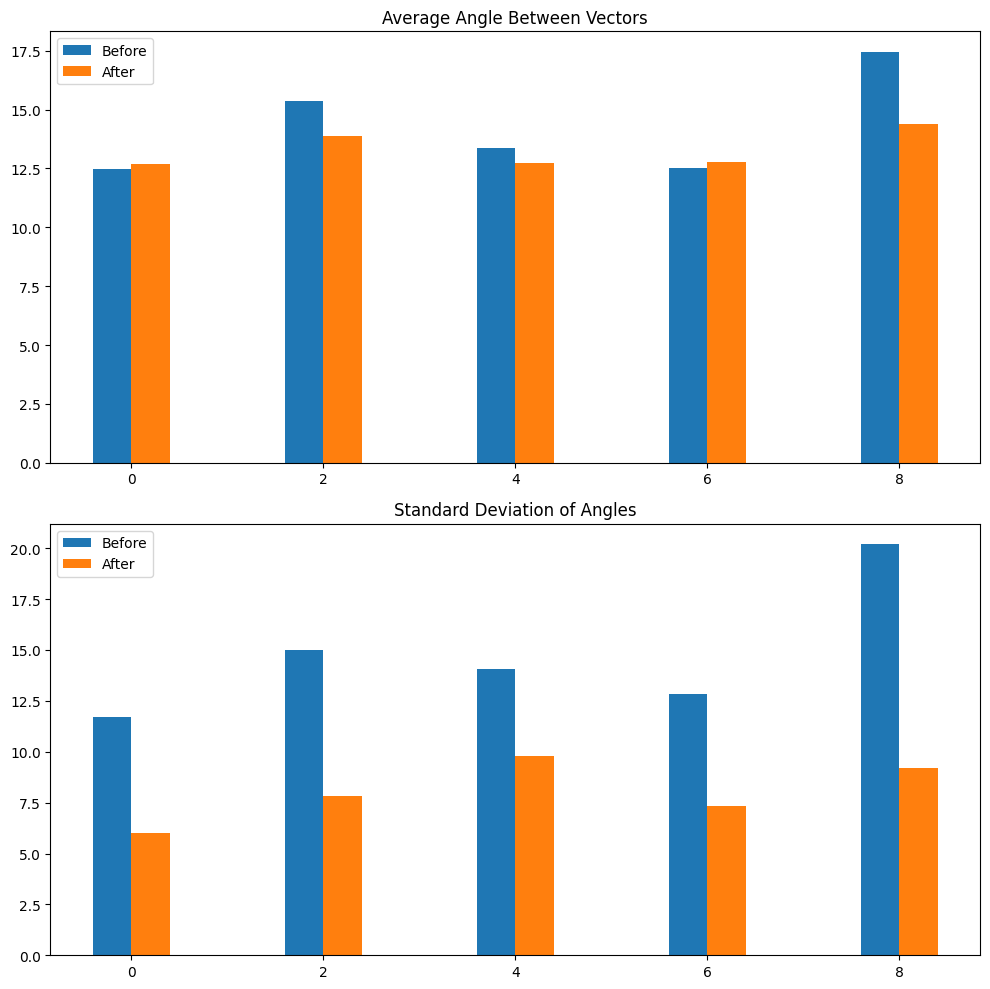

In [35]:
# Process files and plot results
avg_angles, std_angles = process_file_pairs(paths2)
plot_results(avg_angles, std_angles)